In [228]:
import matplotlib
print(matplotlib.matplotlib_fname())
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "bookman",
})
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


matplotlibrc


In [229]:
U = np.array([
    0.72,
    1.84,
    2.65,
    3.19,
    3.71,
    4.26,
    4.66,
    4.95,
    5.25,
    5.60,
    5.81,
    5.97,
    6.15,
    6.26,
    6.30
])

I = np.array([
    12.56,
    10.91,
    9.71,
    8.92,
    8.14,
    7.30,
    6.74,
    6.32,
    5.85,
    5.36,
    5.05,
    4.81,
    4.55,
    4.38,
    4.32
])

In [230]:
df = pd.DataFrame({'U':U, 'I': I})

In [231]:
lr = linregress(df['I'], df['U'])
r = np.abs(lr.slope)
eds = lr.intercept

In [232]:
print(lr.slope, eds)

-0.6773154320895319 9.225595675655578


In [233]:
df['Pr'] = df['U'] * df['I']
df['P'] = eds * df['I']
df['Ps'] = (df['I'] ** 2) * r

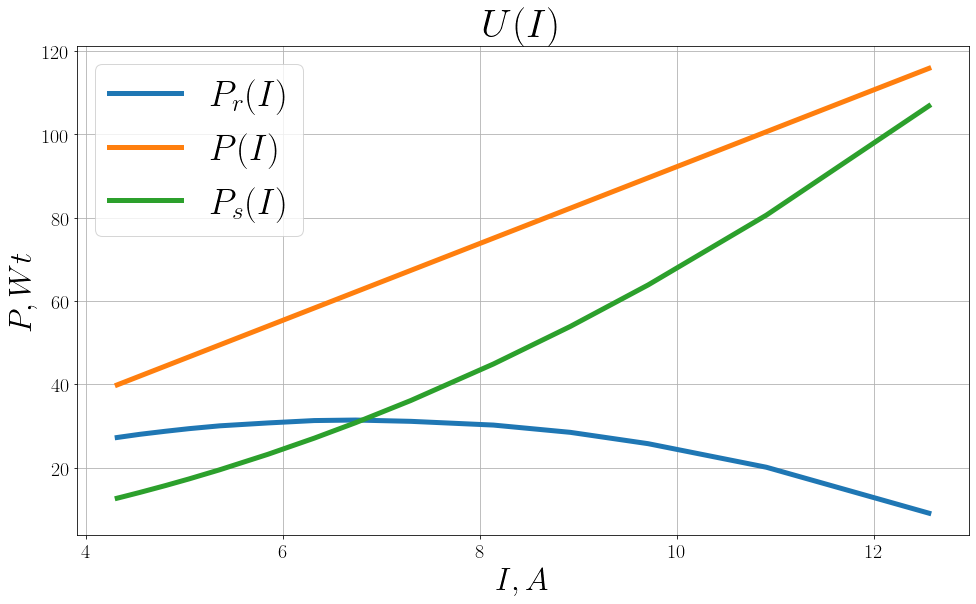

In [242]:
width = 5
plt.figure(figsize=(16, 9))
plt.plot('I', 'Pr', '', data=df, linewidth=width, label=r'$P_r(I)$')
plt.plot('I', 'P', '', data=df, linewidth=width, label=r'$P(I)$')
plt.plot('I', 'Ps', '', data=df, linewidth=width, label=r'$P_s(I)$')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend()
plt.xlabel('$I, A$', fontsize=32)
plt.ylabel('$P, Wt$', fontsize=32)
# plt.axis('equal')
plt.savefig('P(I).png')
plt.title(r'$U(I)$', fontsize=40)
plt.show()
plt.close()


In [222]:
R = df['Pr'].max() / (I_star ** 2)


In [223]:
print(R, r)

0.6913946587537091 0.6773154320895319


In [224]:
lr = linregress(df['I'], df['efficiency'])
slope = lr.slope
intercept = lr.intercept
def efficiency(I):
    return slope * I + intercept

KeyError: 'efficiency'

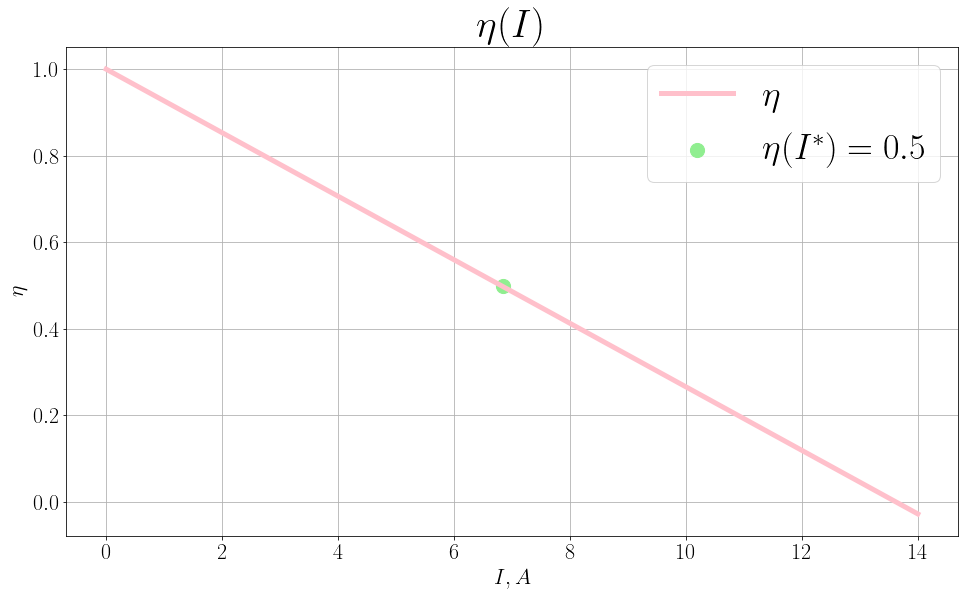

In [249]:
plt.figure(figsize=(16, 9))
df['efficiency'] = df['Pr'] / df['P']
x = np.linspace(0, 14)
plt.plot(x, efficiency(x), linewidth=width, label=r'$\eta$', c='pink')
plt.scatter(6.85, .5, s=200, c='lightgreen', label=r'$\eta(I^*)=0.5$')
plt.grid()
plt.legend()
plt.xlabel(r'$I,A$')
plt.ylabel(r'$\eta$')
plt.title(r'$\eta(I)$', fontsize=40)
plt.savefig("plots/eta(I).png")
plt.show()
plt.close()

In [227]:
df.round(decimals=3)

,U,I,Pr,P,Ps,efficiency
0,0.72,12.56,9.043,115.873,106.849,0.078
1,1.84,10.91,20.074,100.651,80.620,0.199
2,2.65,9.71,25.732,89.581,63.860,0.287
3,3.19,8.92,28.455,82.292,53.892,0.346
4,3.71,8.14,30.199,75.096,44.879,0.402
5,4.26,7.30,31.098,67.347,36.094,0.462
6,4.66,6.74,31.408,62.181,30.769,0.505
7,4.95,6.32,31.284,58.306,27.054,0.537
8,5.25,5.85,30.712,53.970,23.179,0.569
9,5.60,5.36,30.016,49.449,19.459,0.607


In [243]:
I_star

6.74